# 1. Setup game and Import libraries

In [1]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

In [2]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')

In [3]:
print(env.action_space)
print(env.observation_space.shape)

Discrete(256)
(240, 256, 3)


# 2.Preprocess the Environment

In [5]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0') #we use the make() method to create the environment. This method is provided by the gym_super_mario_bros library. It takes the environment name as an argument. We use the SuperMarioBros-v0 environment
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT) #the SimpleMovement object is provided by the gym_super_mario_bros library. It is a list of actions to be performed by the agent. The JoypadSpace object is provided by the gym library. It maps the actions to the environment.   
print(env.action_space)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)  #the GrayScaleObservation object is provided by the gym_super_mario_bros library. It converts the RGB observation to grayscale.
print(env.observation_space.shape)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])    #the DummyVecEnv object is provided by the stable_baselines library. It wraps the environment to be compatible with the stable_baselines library.

# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')    #the VecFrameStack object is provided by the stable_baselines library. It stacks the frames together to speed up the training process.


Discrete(7)
(240, 256, 1)


In [ ]:
env.reset()

In [29]:

state , reward, done, info = env.step([env.action_space.sample()])

### Show the effect of Grey Scale

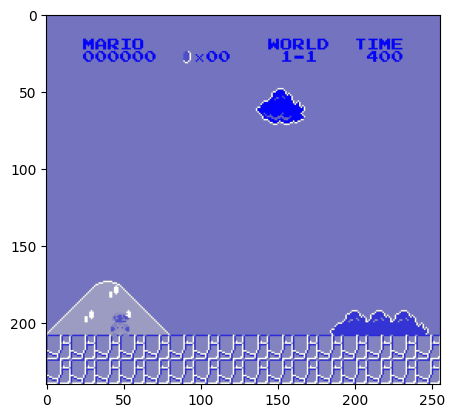

In [25]:
from matplotlib import pyplot as plt
plt.imshow(state[0])

### Framestacking Preview

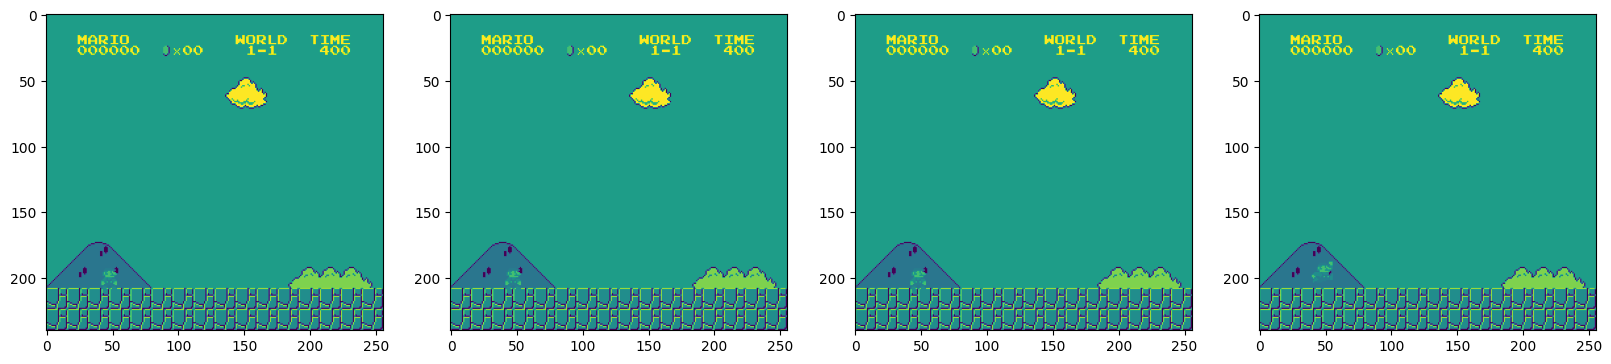

In [30]:
plt.figure(figsize=(20, 16))
for idx in range(state.shape[3]):
    plt.subplot(1, 4, idx + 1)
    plt.imshow(state[0][ :, :, idx])

plt.show()

In [5]:
print(SIMPLE_MOVEMENT)

[['NOOP'], ['right'], ['right', 'A'], ['right', 'B'], ['right', 'A', 'B'], ['A'], ['left']]


# 3.Train the Model

In [7]:
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback


In [8]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [9]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

### check_freq
check_freq is for saving the trained model every couple of steps you can set to any number of step you want <br>
for this code the model is gonna train for 4 million steps and it is gonna save for every 100k steps 

In [10]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=100000, save_path=CHECKPOINT_DIR)


In [11]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512) 

Using cpu device
Wrapping the env in a VecTransposeImage.


### you can change how much steps you want to train you model for by changing total_timesteps
for this code it is set to 4 million steps but you can change however you want

In [ ]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=4000000, callback=callback)

### This tensorboard shows you how your model is performing

In [ ]:
%tensorboard --logdir ./logs

# 4.Test the model
choose which trained model you want to test by PPO.load to where your trained model is saved 

In [13]:
# Load model
model = PPO.load("./train/best_model_1000000")
state = env.reset()
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

C:\Users\basse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


In [45]:
env.close()